In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

nfl_data=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2019.csv")
nfl_data

,type,game_id,home_team,away_team,week,season,state_of_game,game_url,home_score,away_score
0,reg,2019090500,CHI,GB,1,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,3,10
1,reg,2019090800,CAR,LA,1,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,27,30
2,reg,2019090806,PHI,WAS,1,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,32,27
3,reg,2019090805,NYJ,BUF,1,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,16,17
4,reg,2019090804,MIN,ATL,1,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,28,12
...,...,...,...,...,...,...,...,...,...,...
251,reg,2019122900,BAL,PIT,17,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,28,10
252,reg,2019122907,JAX,IND,17,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,38,20
253,reg,2019122913,DEN,OAK,17,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,16,15
254,reg,2019122914,LA,ARI,17,2019,POST,http://www.nfl.com/liveupdate/game-center/2019...,31,24


Drop unwanted collums

In [3]:
# #total yards gained
# chart = sns.barplot(x="Down", y="Yards Gained", data=nfl_dataframe)
# #chart = sns.barplot(x="PlayType",y="Yards", data = nfl_dataframe)
nfl_data.columns
dropw=["type","game_id","game_url"]
nfl_data.drop(columns=dropw, axis=1, inplace=True)
nfl_data

,home_team,away_team,week,season,state_of_game,home_score,away_score
0,CHI,GB,1,2019,POST,3,10
1,CAR,LA,1,2019,POST,27,30
2,PHI,WAS,1,2019,POST,32,27
3,NYJ,BUF,1,2019,POST,16,17
4,MIN,ATL,1,2019,POST,28,12
...,...,...,...,...,...,...,...
251,BAL,PIT,17,2019,POST,28,10
252,JAX,IND,17,2019,POST,38,20
253,DEN,OAK,17,2019,POST,16,15
254,LA,ARI,17,2019,POST,31,24


    home_team away_team  week  season state_of_game  home_score  away_score  \
0         CHI        GB     1    2019          POST           3          10   
1         CAR        LA     1    2019          POST          27          30   
2         PHI       WAS     1    2019          POST          32          27   
3         NYJ       BUF     1    2019          POST          16          17   
4         MIN       ATL     1    2019          POST          28          12   
..        ...       ...   ...     ...           ...         ...         ...   
251       BAL       PIT    17    2019          POST          28          10   
252       JAX       IND    17    2019          POST          38          20   
253       DEN       OAK    17    2019          POST          16          15   
254        LA       ARI    17    2019          POST          31          24   
255       SEA        SF    17    2019          POST          21          26   

     point_difference winner  
0                  -

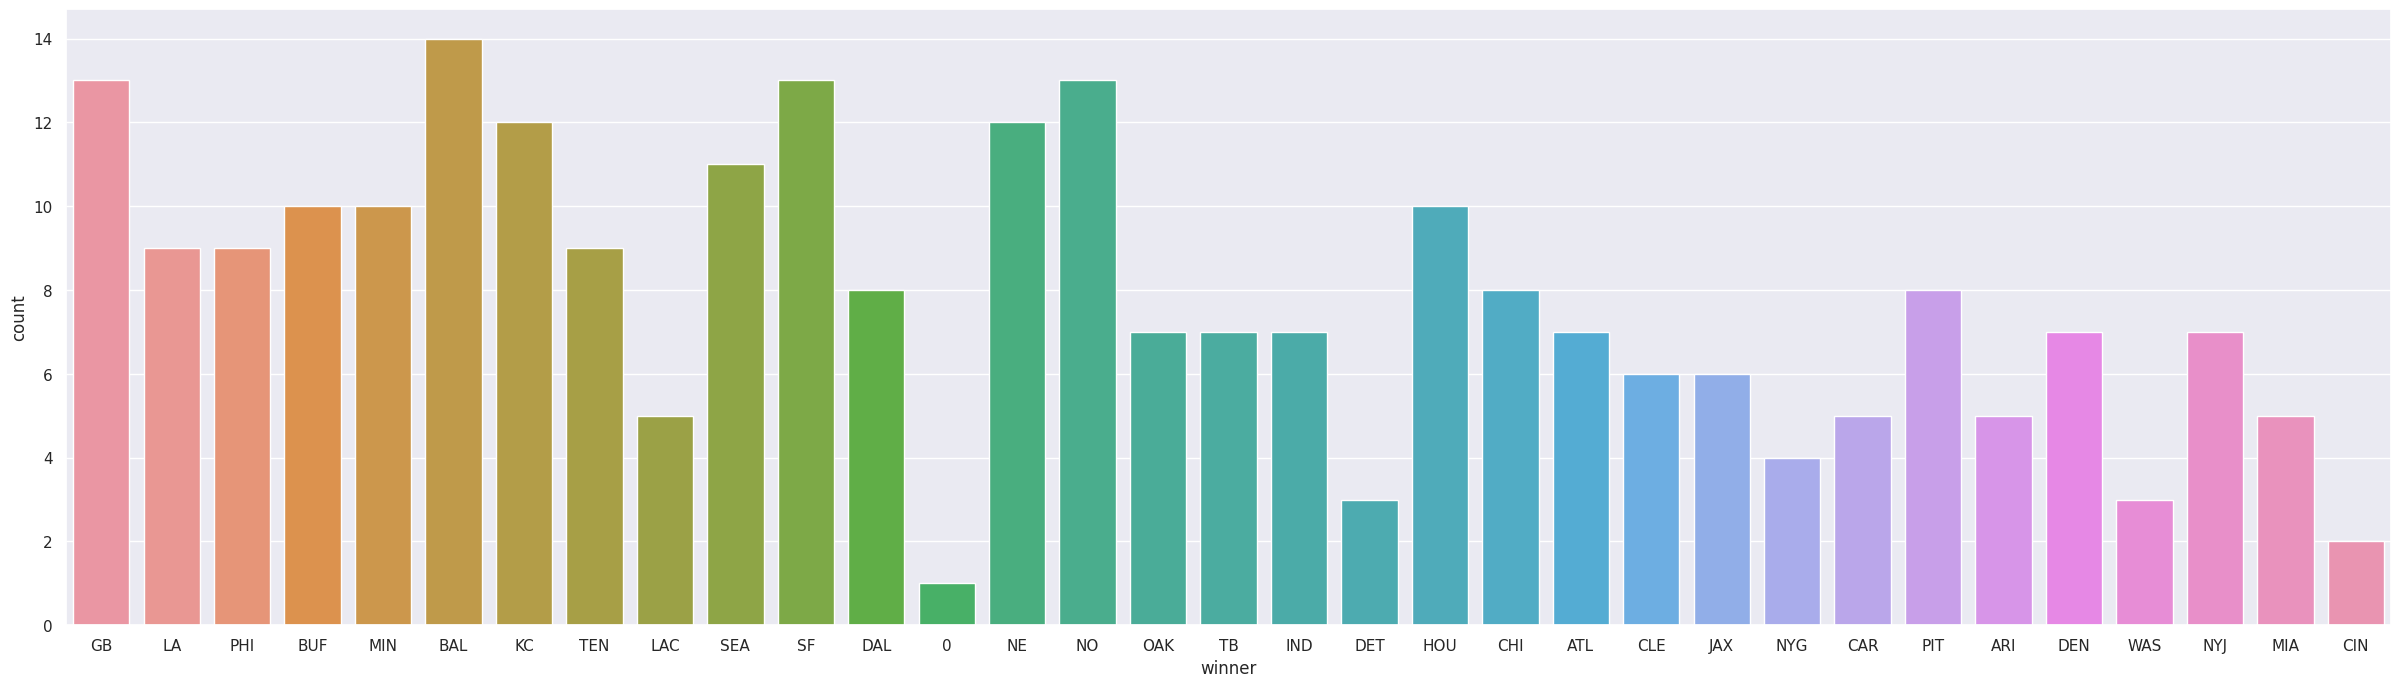

In [10]:
# # Group the data by player and calculate the total passing yards gained for each player
# player_data = nfl_data.groupby("Passer")["Yards Gained"].sum()
# down_data=nfl_data.groupby("Down")["Yards Gained"].sum()
# # Create a chart of the pass values
# passchart = sns.barplot(x=down_data.index, y=down_data.values)


# #refines the chart so that the labels are tilted
# import matplotlib.pyplot as plt
# plt.xticks(rotation=45)
nfl_data["point_difference"]=nfl_data["home_score"]-nfl_data["away_score"]
conditions=[(nfl_data["home_score"]>nfl_data["away_score"]),(nfl_data['home_score']<nfl_data["away_score"])]
values=[nfl_data["home_team"],nfl_data["away_team"]]
nfl_data['winner']=np.select(conditions, values)
print(nfl_data)
sns.countplot(data=nfl_data,x='winner')
sns.set(rc = {'figure.figsize':(30, 8)})



Sort by division

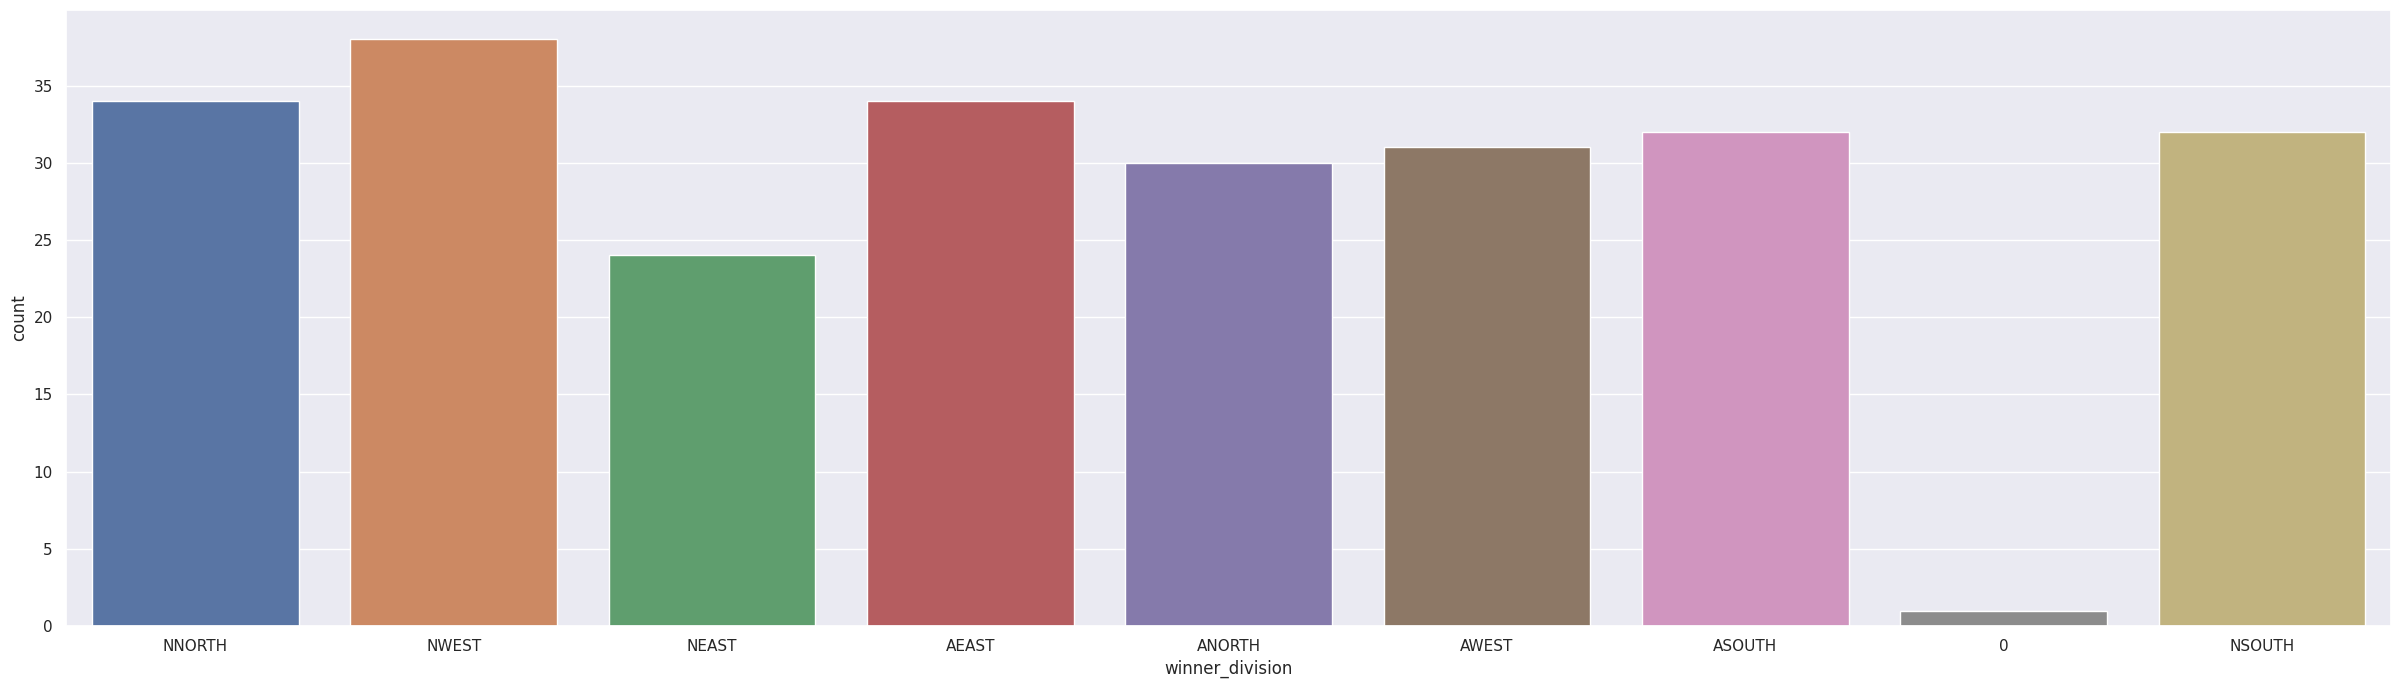

In [12]:
conditions2 = [
    (nfl_data["winner"].isin(["BUF", "MIA", "NYJ", "NE"])),
    (nfl_data["winner"].isin(["DEN", "OAK", "KC", "LAC"])),
    (nfl_data["winner"].isin(["BAL", "CLE", "CIN", "PIT"])),
    (nfl_data["winner"].isin(["JAX", "TEN", "HOU", "IND"])),
    (nfl_data["winner"].isin(["DAL", "PHI", "NYG", "WAS"])),
    (nfl_data["winner"].isin(["SF", "LA", "ARI", "SEA"])),
    (nfl_data["winner"].isin(["CHI", "MIN", "DET", "GB"])),
    (nfl_data["winner"].isin(["TB", "ATL", "CAR", "NO"]))
]

values2 = ["AEAST", "AWEST", "ANORTH", "ASOUTH", "NEAST", "NWEST", "NNORTH", "NSOUTH"]
nfl_data['winner_division'] = np.select(conditions2, values2)
sns.countplot(data=nfl_data,x='winner_division')
sns.set(rc = {'figure.figsize':(30, 8)})

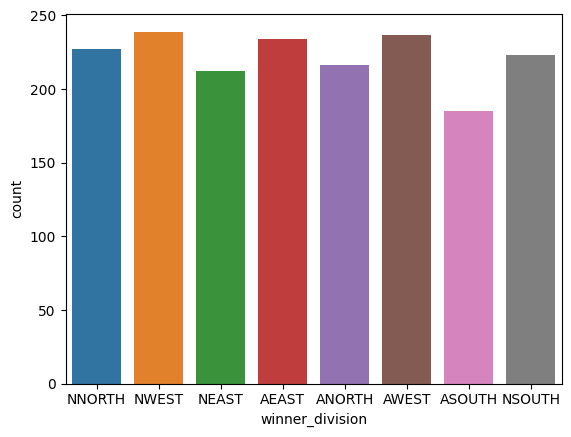

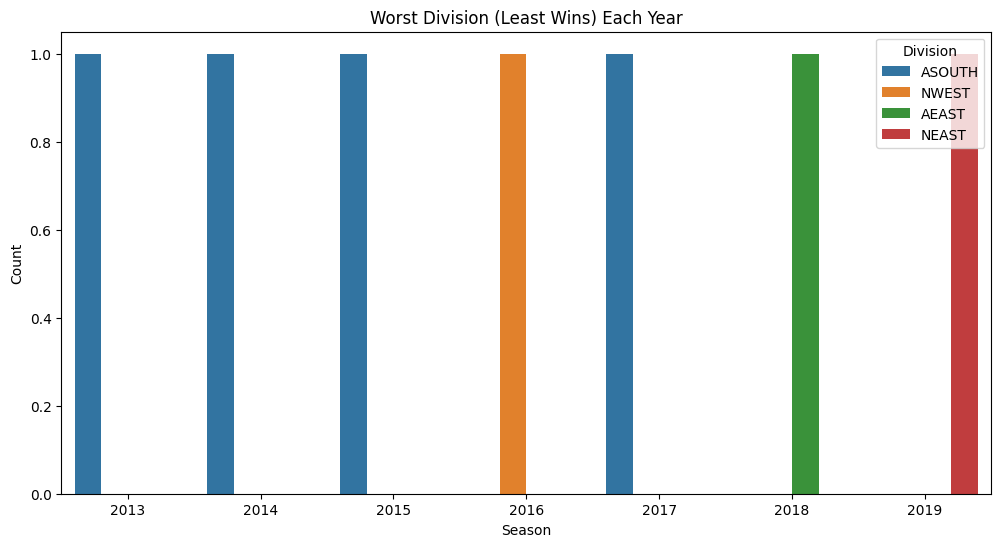

In [5]:
nfl_data19=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2019.csv")
nfl_data18=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2018.csv")
nfl_data17=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2017.csv")
nfl_data16=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2016.csv")
nfl_data15=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2015.csv")
nfl_data14=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2014.csv")
nfl_data13=pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2013.csv")
all_nfl_data = pd.concat([nfl_data19,nfl_data18, nfl_data17, nfl_data16, nfl_data15, nfl_data14, nfl_data13])
drop=["type","game_id","game_url"]
all_nfl_data.drop(columns=drop, axis=1, inplace=True)
all_nfl_data["point_difference"]=all_nfl_data["home_score"]-all_nfl_data["away_score"]
conditions3=[(all_nfl_data["home_score"]>all_nfl_data["away_score"]),(all_nfl_data['home_score']<all_nfl_data["away_score"])]
values3=[all_nfl_data["home_team"],all_nfl_data["away_team"]]
all_nfl_data['winner']=np.select(conditions3, values3)
conditions4 = [
    (all_nfl_data["winner"].isin(["BUF", "MIA", "NYJ", "NE"])),
    (all_nfl_data["winner"].isin(["DEN", "OAK", "KC", "SD" , "LAC"])),
    (all_nfl_data["winner"].isin(["BAL", "CLE", "CIN", "PIT"])),
    (all_nfl_data["winner"].isin(["JAX", "TEN", "HOU", "IND"])),
    (all_nfl_data["winner"].isin(["DAL", "PHI", "NYG", "WAS"])),
    (all_nfl_data["winner"].isin(["SF", "LA","STL", "ARI", "SEA"])),
    (all_nfl_data["winner"].isin(["CHI", "MIN", "DET", "GB"])),
    (all_nfl_data["winner"].isin(["TB", "ATL", "CAR", "NO"]))
]

values4 = ["AEAST", "AWEST", "ANORTH", "ASOUTH", "NEAST", "NWEST", "NNORTH", "NSOUTH"]
all_nfl_data['winner_division'] = np.select(conditions4, values4)
all_nfl_data = all_nfl_data[all_nfl_data['winner_division'] != "0"]
sns.countplot(data=all_nfl_data,x='winner_division')

division_wins_counts = all_nfl_data.groupby(['season', 'winner_division']).size().reset_index(name='wins_count')

# Find the worst division (least wins) for each year
worst_divisions = division_wins_counts.loc[division_wins_counts.groupby('season')['wins_count'].idxmin()]

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='winner_division', data=worst_divisions)
plt.title('Worst Division (Least Wins) Each Year')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Division')
plt.show()

Graph 1 : as a nfl analyst, I would like to know which nfl divison has the most amount of total wins in a season
Graph 2 : As a nfl analyst, I would llike to ee if there is a trend in strongest divsion in the nfl over many years
Graph: 3: As a nfl analyst, I would like to figure out what changes can be done to balance out the divisions